<a href="https://colab.research.google.com/github/lecarino/Space-Race-Analysis/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 59.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
#floating-point numbers in pandas DataFrames will be displayed with two decimal places and a comma as a thousands separator

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
df_data.shape
#shape: (rows, columns)

(4324, 9)

In [ ]:
print(f'rows: {df_data.shape[0]} or {len(df_data)} or {df_data.index.size}')
print(f'columns: {df_data.shape[1]} or {len(df_data.columns)}')

rows: 4324 or 4324 or 4324
columns: 9 or 9


In [ ]:
print(f'column names: \n{df_data.columns}')

column names: 
Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [ ]:
print(f"Any duplicates? \n {df_data.duplicated().values.any()}")

Any duplicates? 
 False


In [ ]:
print(f"Any NaN Values? \n {df_data.isna().values.any()}")

Any NaN Values? 
 True


In [ ]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
columns_to_remove = ['Unnamed: 0.1', 'Unnamed: 0']

#axis=1 to remove columns and not rows
df_data_clean = df_data.drop(columns=columns_to_remove, axis=1)
df_data_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
# Check the data type before conversion
print(f'Before: {df_data_clean["Price"].dtype}')

# Remove commas and convert to numeric
df_data_clean['Price'] = df_data_clean['Price'].astype(str).str.replace(",", '')
df_data_clean['Price'] = pd.to_numeric(df_data_clean['Price'], errors='coerce')

# Check the data type after conversion
print(f'After: {df_data_clean["Price"].dtype}')

# Display the DataFrame
df_data_clean.head()




Before: object
After: float64


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


## Descriptive Statistics

## Measures of Central Tendency:
- **Mean:** The average value of a set of data points.
- **Median:** The middle value of a dataset when it is ordered.
- **Mode:** The most frequently occurring value in a dataset.

## Measures of Dispersion:
- **Range:** The difference between the maximum and minimum values in a dataset.
- **Variance:** A measure of how spread out the values are from the mean.
- **Standard Deviation:** A standardized measure of the amount of variation or dispersion in a set of values.

In [ ]:
#Mean, Median, Mode
print(f"Mean: {df_data_clean['Price'].mean():.2f}")
print(f"Median: {df_data_clean['Price'].median()}")
print(f"Mode: {df_data_clean['Price'].mode().iloc[0]}")

Mean: 153.79
Median: 62.0
Mode: 450.0


In [ ]:
#Range, Variance, SD:
print(f"Range: {df_data_clean['Price'].max() - df_data_clean['Price'].min()}")
print(f"Variance: {df_data_clean['Price'].var():.2f}")
print(f"Standard Deviation: {df_data_clean['Price'].std():.2f}")

Range: 4994.7
Variance: 83203.82
Standard Deviation: 288.45


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
launch_count_by_organization = df_data_clean.groupby(df_data_clean['Organisation']).size().reset_index(name="Launch Count")

#Alplabetically Sorted
launch_count_by_organization

,Organisation,Launch Count
0,AEB,3
1,AMBA,8
2,ASI,9
3,Arianespace,279
4,Arm??e de l'Air,4
5,Blue Origin,12
6,Boeing,136
7,CASC,251
8,CASIC,5
9,CECLES,4


In [ ]:
#Sorted by most launches
launch_count_by_organization.sort_values(by='Launch Count', ascending=False)

,Organisation,Launch Count
40,RVSN USSR,1777
3,Arianespace,279
17,General Dynamics,251
7,CASC,251
35,NASA,203
52,VKS RF,201
49,US Air Force,161
48,ULA,140
6,Boeing,136
34,Martin Marietta,114


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
Active_vs_Retired = df_data_clean.groupby("Rocket_Status").size().reset_index(name="Count")
Active_vs_Retired

,Rocket_Status,Count
0,StatusActive,790
1,StatusRetired,3534


In [ ]:
df_data_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_status = df_data_clean.groupby("Mission_Status").size().reset_index(name="count")
mission_status

,Mission_Status,count
0,Failure,339
1,Partial Failure,102
2,Prelaunch Failure,4
3,Success,3879


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

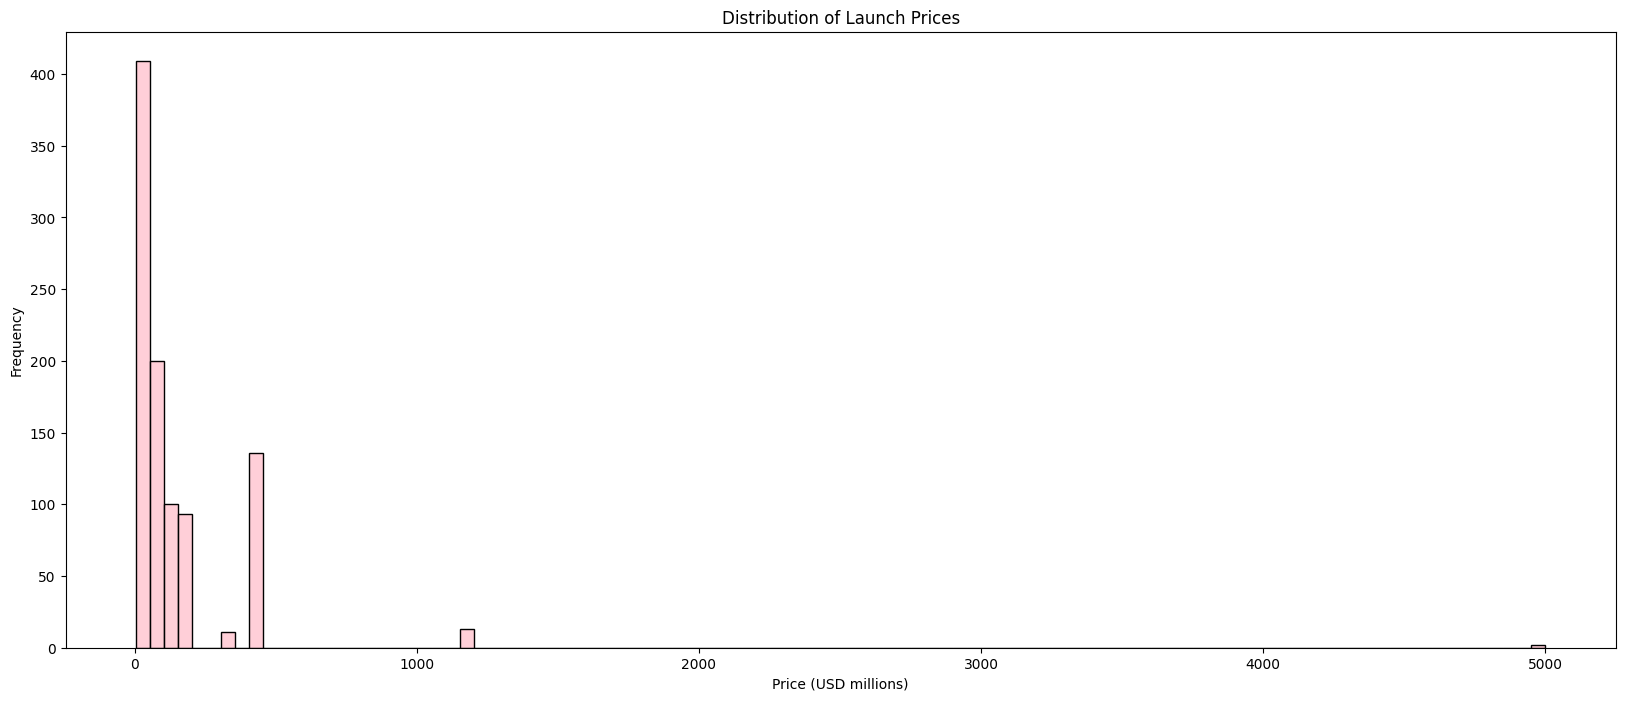

In [ ]:
# Filter out missing values in the 'Price' column
prices = df_data_clean["Price"].dropna()

plt.figure(figsize=(20, 8))
sns.histplot(prices, bins=100, color='pink', edgecolor='black')

# labels and title
plt.xlabel('Price (USD millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Launch Prices')

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
# Check the data type before conversion
print(f'Before: {df_data_clean["Location"].dtype}')

# Convert to String
df_data_clean['Location'] = df_data_clean['Location'].astype(str)
# Check the data type after conversion
print(f'After: {df_data_clean["Price"].dtype}')

# Display the DataFrame
df_data_clean.head()

Before: object
After: float64


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [ ]:
df_data_clean['Country'] = df_data_clean['Location'].apply(lambda x: ''.join(x.split()[-2:]))
df_data_clean.groupby(df_data_clean['Country']).size().reset_index(name='Count')

,Country,Count
0,"Airbase,Israel",11
1,"Alaska,USA",3
2,"Algeria,France",4
3,BarentsSea,3
4,"California,USA",454
5,"Center,China",268
6,"Center,Iran",13
7,"Center,Japan",126
8,"Centre,India",76
9,"Complex,Australia",6


In [ ]:
df_data_clean['Country'] = df_data_clean['Country'].replace({
    'BarentsSea': 'Russian Federation',
    'Cosmodrome,Russia': 'Russian Federation',
    'GranCanaria': 'USA',
    'Yar,Russia': 'Russian Federation',
    'YellowSea': 'China',
    'TestSite': 'Iran, Islamic Republic of',
    'Center,Iran': 'Iran, Islamic Republic of',
    'NewMexico': 'USA',
    'NewZealand': 'New Zealand',
    'RangeFacility': 'USA',
    'NorthKorea': "Korea, Democratic People's Republic of",
    'PacificOcean': 'Pacific Ocean',
    'SouthKorea': 'Korea, Republic of',

})
df_data_clean['Country'] = df_data_clean['Country'].apply(lambda x: x.split(',')[-1] if x not in ["Korea, Democratic People's Republic of",'Korea, Republic of','Iran, Islamic Republic of'] else x)

df_data_clean = df_data_clean[df_data_clean['Country'] != 'Pacific Ocean']
df_data_clean.groupby(df_data_clean["Country"]).size().reset_index(name="Count")


,Country,Count
0,Australia,6
1,Brazil,3
2,China,269
3,France,303
4,India,76
5,"Iran, Islamic Republic of",14
6,Israel,11
7,Japan,126
8,Kazakhstan,701
9,Kenya,9


In [ ]:
# Convert country names to country codes
df_data_clean['Country_Code'] = df_data_clean['Country'].apply(lambda x: countries.get(x.strip(), {}).alpha3 if countries.get(x.strip()) else None)
#Add a row in the df called "Launch_Count"
country_counts = df_data_clean.groupby(df_data_clean["Country"]).size().reset_index(name="Launch_Count")
df_data_clean = pd.merge(df_data_clean, country_counts, on="Country", how= 'left')
# Display the DataFrame with country codes
df_data_clean


<ipython-input-26-ba5d459bd548>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_clean['Country_Code'] = df_data_clean['Country'].apply(lambda x: countries.get(x.strip(), {}).alpha3 if countries.get(x.strip()) else None)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Launch_Count
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,1351
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,269
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,1351
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,701
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,1351
...,...,...,...,...,...,...,...,...,...,...
4283,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1351
4284,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1351
4285,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1351
4286,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,701


In [ ]:
# fig = px.choropleth(df_data_clean, locations="Country_Code",
#                     color= "Launch_Count",
#                     hover_name="Country", # column to add to hover information
#                     color_continuous_scale=px.colors.sequential.matter)
# fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
df_country_failures = df_data_clean[df_data_clean['Mission_Status'] == "Failure"].groupby('Country').size().reset_index(name = "Failures")
df_country_failures = pd.merge(df_country_failures, df_data_clean[['Country', 'Country_Code']], on='Country', how='left')
df_country_failures.drop_duplicates(subset=['Country']).reset_index(drop=True)

,Country,Failures,Country_Code
0,Australia,3,AUS
1,Brazil,2,BRA
2,China,19,CHN
3,France,13,FRA
4,India,8,IND
5,"Iran, Islamic Republic of",8,IRN
6,Israel,2,ISR
7,Japan,10,JPN
8,Kazakhstan,72,KAZ
9,"Korea, Democratic People's Republic of",3,PRK


In [ ]:
# fig = px.choropleth(df_country_failures,
#                     locations='Country_Code',
#                     color='Failures',
#                     hover_name='Country',
#                     color_continuous_scale=px.colors.sequential.matter,
#                     title='Failures by Country',
#                    )

# fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
df_data_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Launch_Count
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,1351
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,269
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,1351
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,701
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,1351
...,...,...,...,...,...,...,...,...,...,...
4283,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1351
4284,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1351
4285,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1351
4286,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,701


In [ ]:
fig = px.sunburst(
    df_data_clean,
    path=['Mission_Status','Country']
    )
fig.show()

In [ ]:
fig = px.sunburst(
    df_data_clean,
    path=['Mission_Status','Organisation', 'Country']
    )
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
spent_by_organization = df_data_clean.groupby('Organisation')['Price'].sum().reset_index(name='Price')
spent_by_organization

,Organisation,Price
0,AEB,0.00
1,AMBA,0.00
2,ASI,0.00
3,Arianespace,"16,345.00"
4,Arm??e de l'Air,0.00
5,Blue Origin,0.00
6,Boeing,"1,241.00"
7,CASC,"6,340.26"
8,CASIC,0.00
9,CECLES,0.00


<ipython-input-34-aac63d505840>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




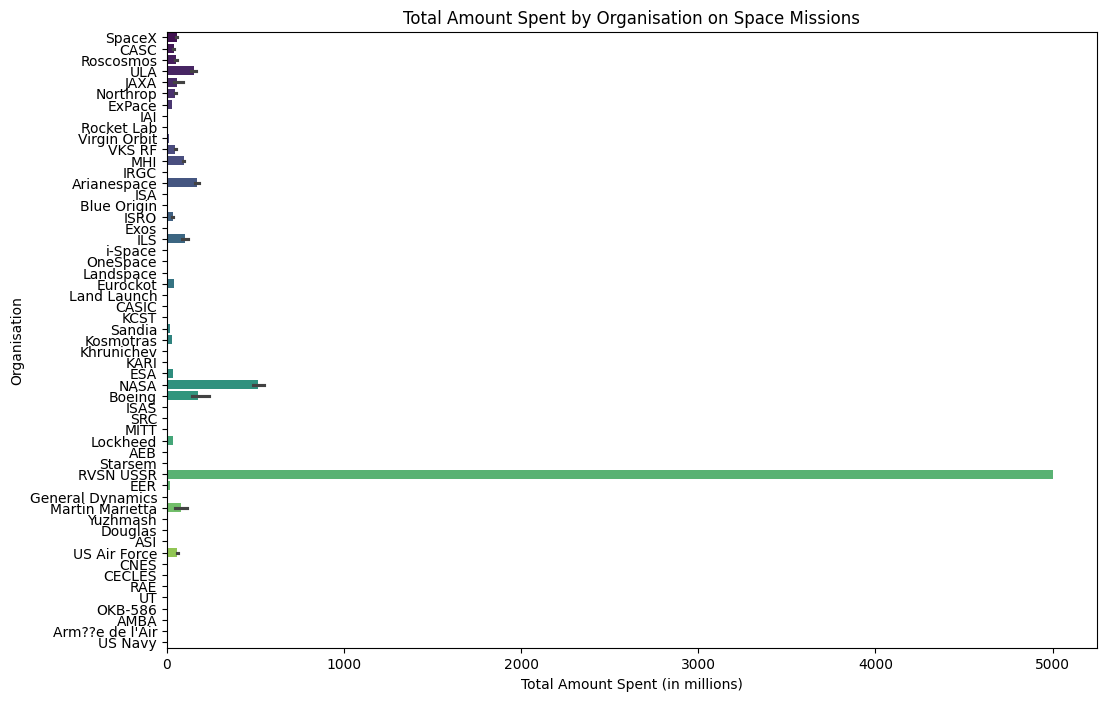

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Price', y='Organisation', data=df_data_clean, palette='viridis')
ax.set_xlabel('Total Amount Spent (in millions)')
ax.set_title('Total Amount Spent by Organisation on Space Missions')

plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
organization_launches = df_data_clean.groupby(df_data_clean['Organisation']).size().reset_index(name='Launches')
organization_launches = pd.merge(organization_launches,spent_by_organization, how='left', on= 'Organisation')
organization_launches['Price_Per_Launch'] = organization_launches['Price']/organization_launches['Launches']
organization_launches

,Organisation,Launches,Price,Price_Per_Launch
0,AEB,3,0.00,0.00
1,AMBA,8,0.00,0.00
2,ASI,9,0.00,0.00
3,Arianespace,279,"16,345.00",58.58
4,Arm??e de l'Air,4,0.00,0.00
5,Blue Origin,12,0.00,0.00
6,Boeing,136,"1,241.00",9.12
7,CASC,251,"6,340.26",25.26
8,CASIC,5,0.00,0.00
9,CECLES,4,0.00,0.00


In [ ]:
df_data_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Launch_Count
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,1351
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,269
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,1351
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,701
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,1351
...,...,...,...,...,...,...,...,...,...,...
4283,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1351
4284,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1351
4285,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1351
4286,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,701


In [ ]:
df_data_clean['Date']

0       Fri Aug 07, 2020 05:12 UTC
1       Thu Aug 06, 2020 04:01 UTC
2       Tue Aug 04, 2020 23:57 UTC
3       Thu Jul 30, 2020 21:25 UTC
4       Thu Jul 30, 2020 11:50 UTC
                   ...            
4283    Wed Feb 05, 1958 07:33 UTC
4284    Sat Feb 01, 1958 03:48 UTC
4285    Fri Dec 06, 1957 16:44 UTC
4286    Sun Nov 03, 1957 02:30 UTC
4287    Fri Oct 04, 1957 19:28 UTC
Name: Date, Length: 4288, dtype: object

# Chart the Number of Launches per Year

In [ ]:
# # Check the data type before conversion
# print(f'Before: {df_data_clean["Date"].dtype}')

df_data_clean['Year'] = pd.to_datetime(df_data_clean['Date'], errors='coerce', utc = True)

df_data_clean['Year'] = df_data_clean['Year'].dt.year
grouped_by_year = df_data_clean.groupby("Year").size().reset_index(name='Launches_per_Year')
grouped_by_year

,Year,Launches_per_Year
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


<ipython-input-39-8521b4dcfe58>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



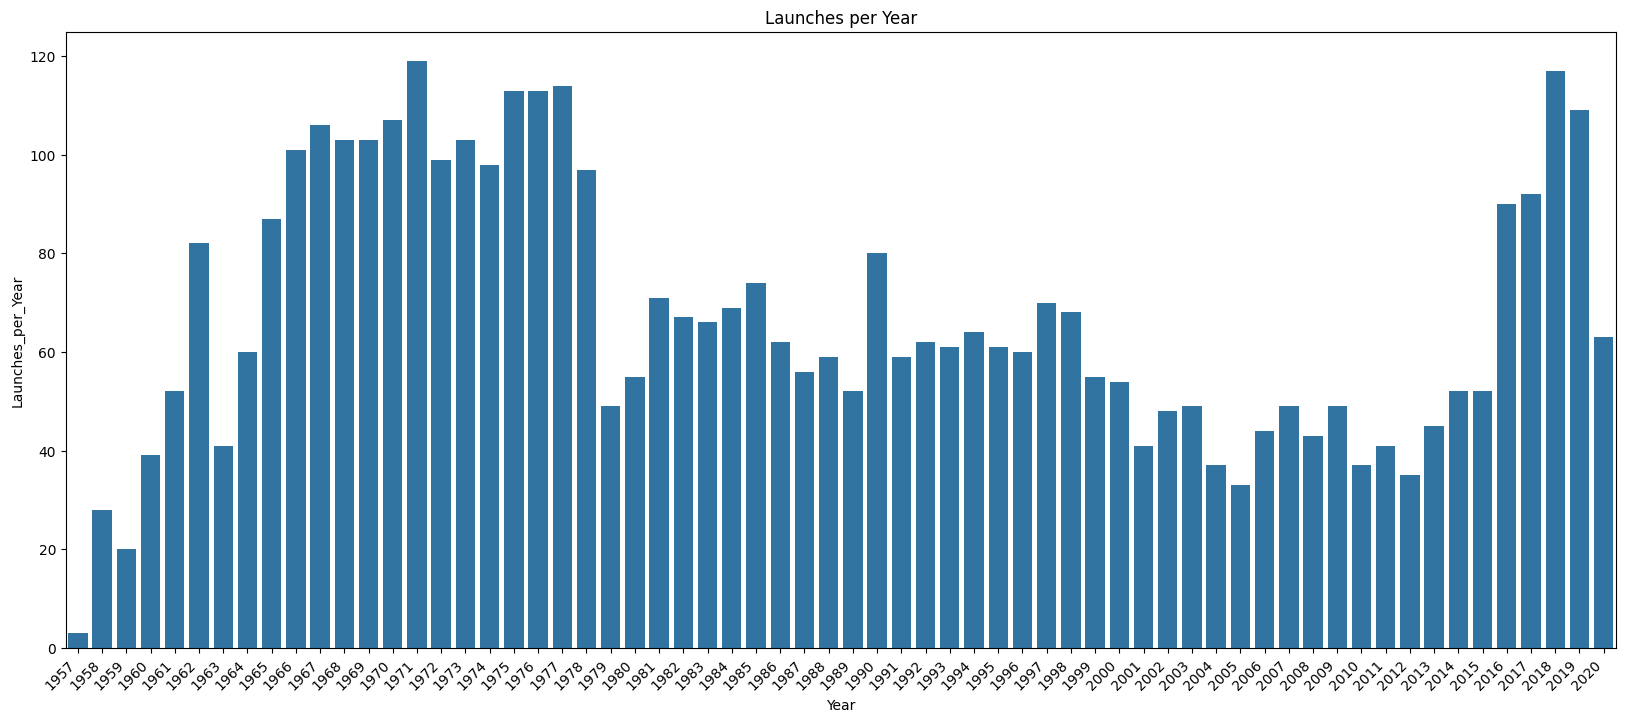

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x='Year', y='Launches_per_Year', data=grouped_by_year)
ax.set_xlabel('Year')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_title('Launches per Year')

plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
df_data_clean['Month'] = pd.to_datetime(df_data_clean['Date'], errors='coerce', utc = True).dt.month
df_data_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Launch_Count,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,1351,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,269,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,1351,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,701,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,1351,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4283,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1351,1958,2
4284,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1351,1958,2
4285,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1351,1957,12
4286,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,701,1957,11


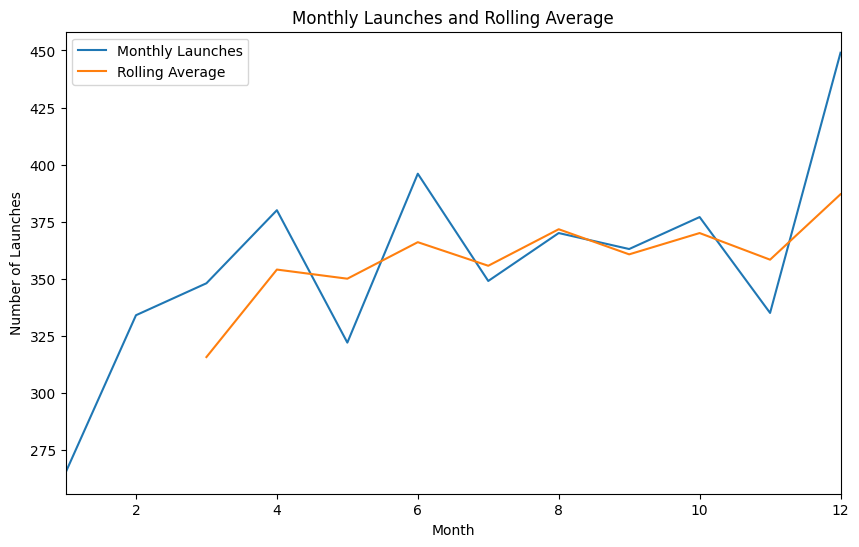

In [ ]:
launches_per_month= df_data_clean.groupby('Month').size()
rolling_avg= launches_per_month.rolling(window=3).mean()



plt.figure(figsize=(10, 6))
launches_per_month.plot(label='Monthly Launches')
rolling_avg.plot(label='Rolling Average')
plt.title('Monthly Launches and Rolling Average')
plt.xlabel('Month')
plt.ylabel('Number of Launches')

plt.legend()
plt.xlim(1,12)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
max_month_index = launches_per_month.idxmax()
max_month_value = launches_per_month.loc[max_month_index]

print(f'The month with the most launches is {max_month_index} with {max_month_value} launches.')



The month with the most launches is 12 with 449 launches.


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
average_price_per_year = df_data_clean.groupby('Year')['Price'].mean()
average_price_per_year

Year
1957     NaN
1958     NaN
1959     NaN
1960     NaN
1961     NaN
        ... 
2016   79.46
2017   69.49
2018   64.75
2019   59.61
2020   56.65
Name: Price, Length: 64, dtype: float64

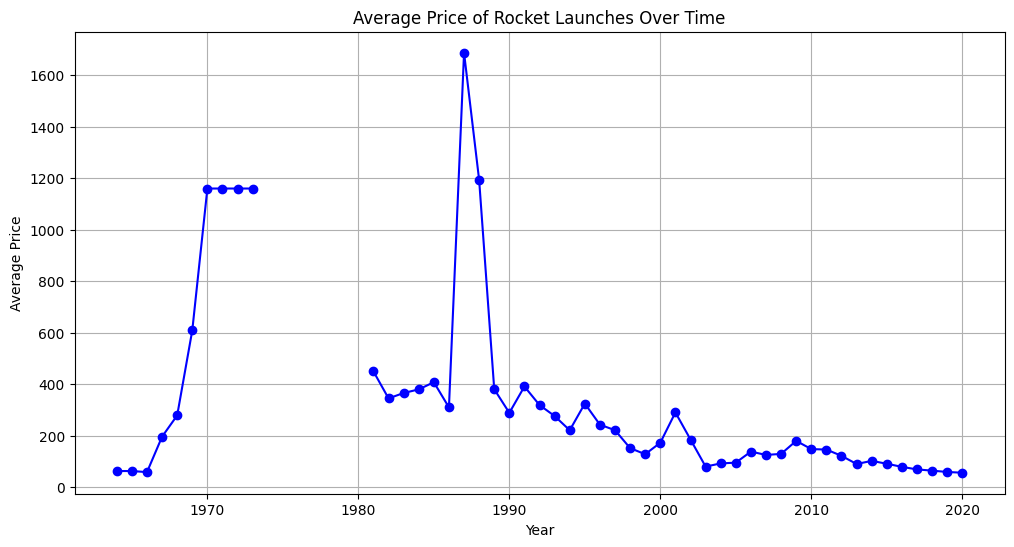

In [ ]:
plt.figure(figsize=(12, 6))
average_price_per_year.plot(kind='line', marker='o', color='b')
plt.title('Average Price of Rocket Launches Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
organization_launches[['Organisation', 'Launches']].sort_values(by='Launches', ascending=False).head(10)

,Organisation,Launches
40,RVSN USSR,1777
3,Arianespace,279
17,General Dynamics,251
7,CASC,251
35,NASA,203
51,VKS RF,201
48,US Air Force,161
47,ULA,140
6,Boeing,136
34,Martin Marietta,114


In [ ]:
launches_by_org_year = df_data_clean.groupby(['Organisation', 'Year']).size().reset_index(name='Launches')
# Find the top 10 organizations with the highest total launches
top_10_organizations = launches_by_org_year.groupby('Organisation')['Launches'].sum().nlargest(10).index
top_10_organizations

Index(['RVSN USSR', 'Arianespace', 'CASC', 'General Dynamics', 'NASA',
       'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta'],
      dtype='object', name='Organisation')

In [ ]:
top_10_data = launches_by_org_year[launches_by_org_year['Organisation'].isin(top_10_organizations)]
top_10_data

,Organisation,Year,Launches
12,Arianespace,1984,3
13,Arianespace,1985,4
14,Arianespace,1986,3
15,Arianespace,1987,2
16,Arianespace,1988,6
...,...,...,...
639,VKS RF,2016,4
640,VKS RF,2017,6
641,VKS RF,2018,5
642,VKS RF,2019,8


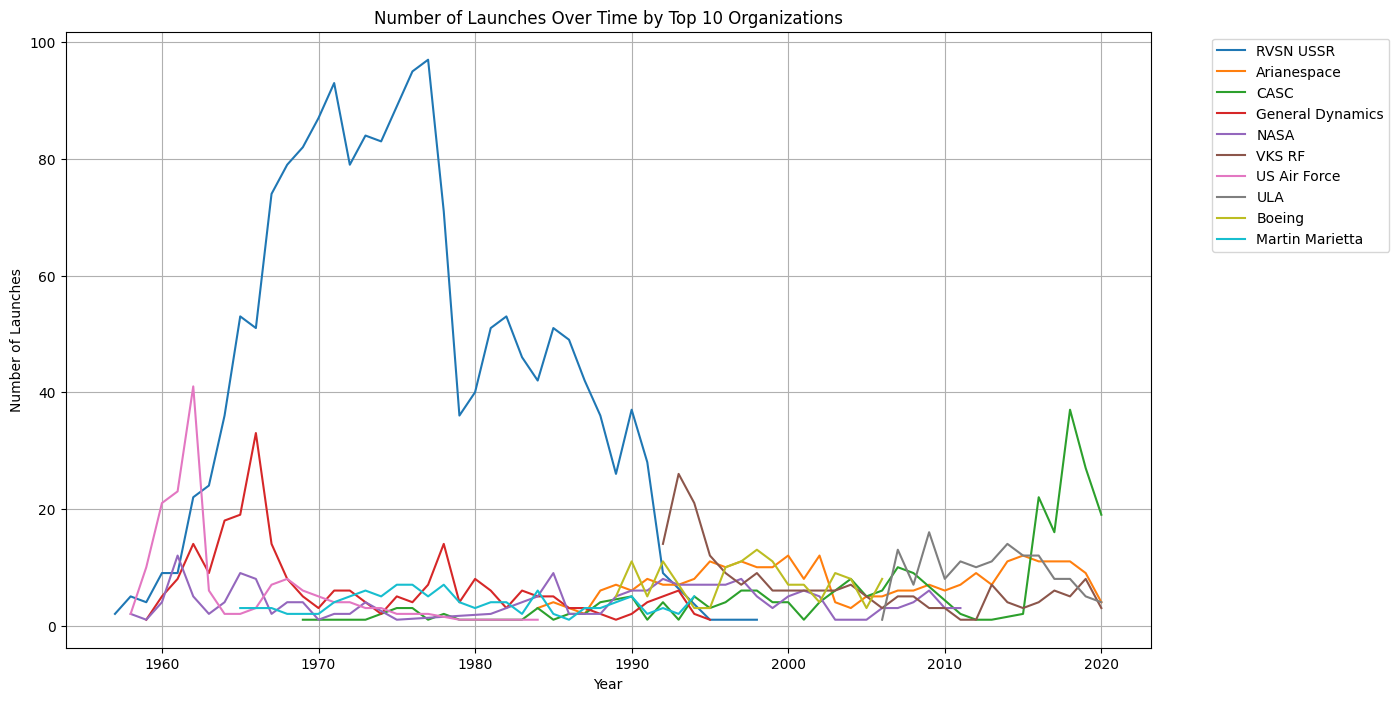

In [ ]:
plt.figure(figsize=(14, 8))

# Plot each organization's launches over time
for org in top_10_organizations:
    org_data = top_10_data[top_10_data['Organisation'] == org]
    plt.plot(org_data['Year'], org_data['Launches'], label=org)

plt.title('Number of Launches Over Time by Top 10 Organizations')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
Cold_War_df = df_data_clean[(df_data_clean['Year'] <= 1991) & ((df_data_clean['Country'] == 'USA') | (df_data_clean['Country'] == 'Russian Federation') | (df_data_clean['Country'] == 'Kazakhstan'))]
Cold_War_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Launch_Count,Year,Month
1682,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan","Fri Dec 20, 1991",Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,Kazakhstan,KAZ,701,1991,12
1683,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,Russian Federation,RUS,1398,1991,12
1685,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,USA,1351,1991,12
1686,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Thu Nov 28, 1991 13:23 UTC",Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,USA,1351,1991,11
1687,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Wed Nov 27, 1991 03:30 UTC",Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,Russian Federation,RUS,1398,1991,11
...,...,...,...,...,...,...,...,...,...,...,...,...
4283,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1351,1958,2
4284,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1351,1958,2
4285,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1351,1957,12
4286,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,701,1957,11


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
CW_country_counts = Cold_War_df['Country'].value_counts()
print(CW_country_counts)

CW_country_counts['USSR'] = CW_country_counts[['Russian Federation', 'Kazakhstan']].sum()
CW_country_counts = CW_country_counts.drop(['Russian Federation', 'Kazakhstan'])
print(CW_country_counts)

Russian Federation    1188
USA                    662
Kazakhstan             582
Name: Country, dtype: int64
USA      662
USSR    1770
Name: Country, dtype: int64


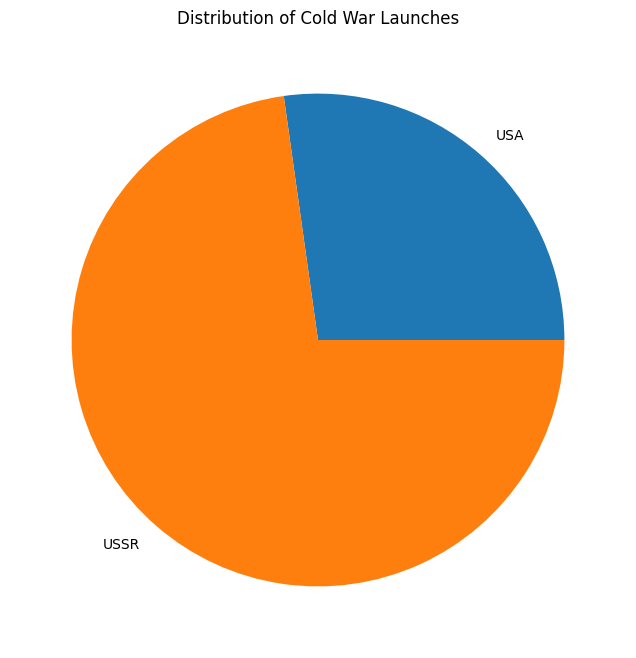

In [ ]:
plt.figure(figsize=(15,8))
plt.pie(CW_country_counts, labels= CW_country_counts.index)
plt.title("Distribution of Cold War Launches")
plt.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
launches_by_country_year = df_data_clean.groupby(['Country', 'Year']).size().reset_index(name='Launches')
# Replace 'Kazakhstan' and 'Russian Federation' with 'USSR' in the launches_by_country_year DataFrame
launches_by_country_year['Country'] = launches_by_country_year['Country'].replace({'Kazakhstan': 'USSR', 'Russian Federation': 'USSR'})
print(launches_by_country_year)
launches_by_CW_countries = launches_by_country_year[(launches_by_country_year['Year']<= 1991) & ((launches_by_country_year['Country'] == 'USA') | (launches_by_country_year['Country'] == 'USSR'))]
launches_by_country_year_combined = launches_by_CW_countries.groupby(['Country', 'Year']).agg({'Launches': 'sum'}).reset_index()
launches_by_country_year_combined.sort_values(by='Year')


       Country  Year  Launches
0    Australia  1967         1
1    Australia  1968         1
2    Australia  1969         1
3    Australia  1970         2
4    Australia  1971         1
..         ...   ...       ...
407        USA  2016        27
408        USA  2017        30
409        USA  2018        34
410        USA  2019        27
411        USA  2020        21

[412 rows x 3 columns]


,Country,Year,Launches
0,USA,1957,1
35,USSR,1957,2
1,USA,1958,23
36,USSR,1958,5
2,USA,1959,16
...,...,...,...
32,USA,1989,16
68,USSR,1990,37
33,USA,1990,26
34,USA,1991,18


In [ ]:
launches_by_CW_countries

,Country,Year,Launches
207,USSR,1957,2
208,USSR,1958,5
209,USSR,1959,4
210,USSR,1960,9
211,USSR,1961,7
...,...,...,...
378,USA,1987,6
379,USA,1988,7
380,USA,1989,16
381,USA,1990,26


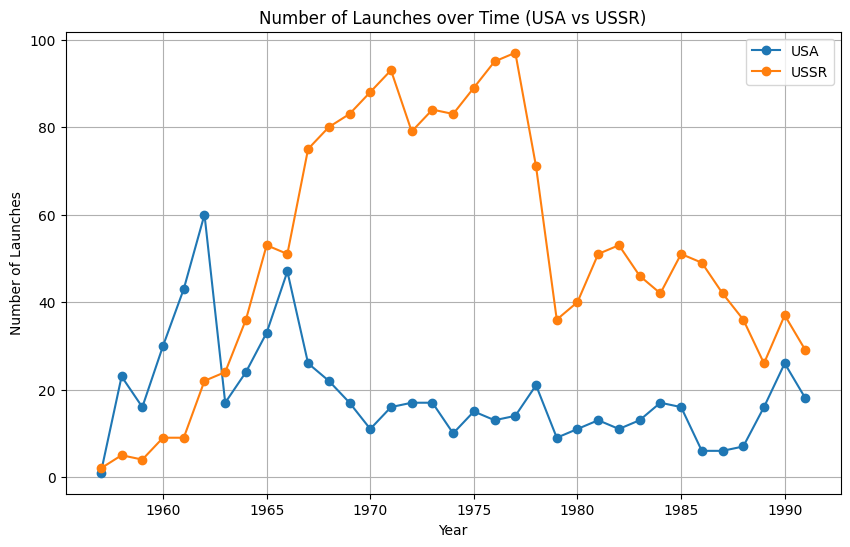

In [ ]:
usa_data = launches_by_country_year_combined[launches_by_country_year_combined['Country'] == 'USA']
ussr_data = launches_by_country_year_combined[launches_by_country_year_combined['Country'] == 'USSR']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(usa_data['Year'], usa_data['Launches'], label='USA', marker='o')
plt.plot(ussr_data['Year'], ussr_data['Launches'], label='USSR', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches over Time (USA vs USSR)')
plt.legend()
plt.grid(True)
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

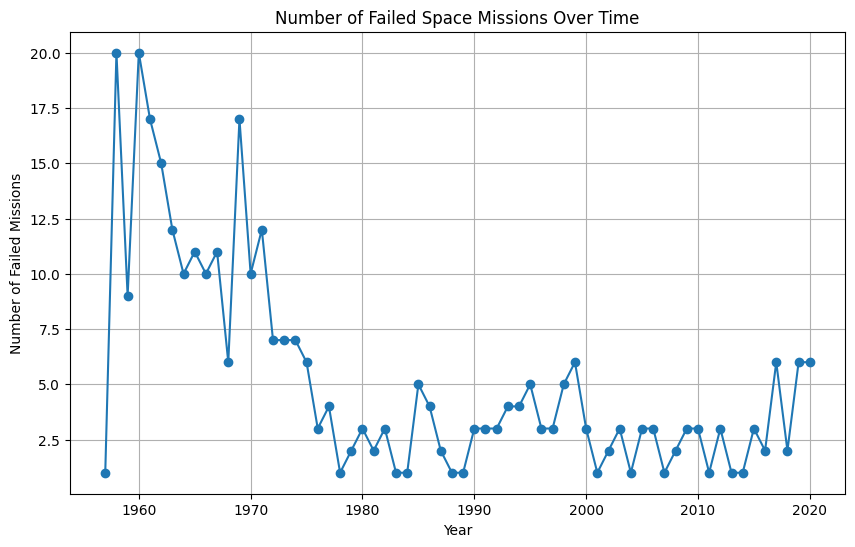

In [ ]:
failed_missions = df_data_clean[df_data_clean['Mission_Status'] == 'Failure']
failed_missions_per_year = failed_missions.groupby('Year').size().reset_index(name='Number_of_Failed_Missions')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(failed_missions_per_year['Year'], failed_missions_per_year['Number_of_Failed_Missions'], marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Failed Missions')
plt.title('Number of Failed Space Missions Over Time')
plt.grid(True)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
failed_missions_per_year
all_missions_per_year = df_data_clean.groupby("Year").size().reset_index(name= 'Number_of_Missions')
all_missions_per_year

percentage_of_failures = pd.merge(failed_missions_per_year, all_missions_per_year, how='left', on='Year')

percentage_of_failures['percentage'] = percentage_of_failures['Number_of_Failed_Missions']/percentage_of_failures['Number_of_Missions']
percentage_of_failures

,Year,Number_of_Failed_Missions,Number_of_Missions,percentage
0,1957,1,3,0.33
1,1958,20,28,0.71
2,1959,9,20,0.45
3,1960,20,39,0.51
4,1961,17,52,0.33
...,...,...,...,...
59,2016,2,90,0.02
60,2017,6,92,0.07
61,2018,2,117,0.02
62,2019,6,109,0.06


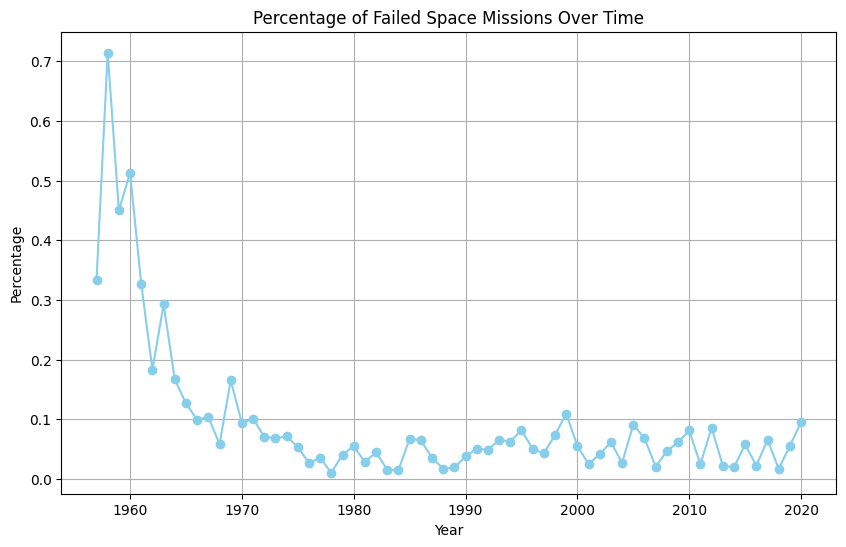

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(percentage_of_failures['Year'], percentage_of_failures['percentage'], marker='o', color='skyblue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Failed Space Missions Over Time')
plt.grid(True)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
successful_missions = df_data_clean[df_data_clean['Mission_Status']== 'Success']
total_launches_by_country = successful_missions.groupby(['Year', 'Country']).size().reset_index(name='Total Launches')
leading_countries_each_year = total_launches_by_country.loc[total_launches_by_country.groupby('Year')['Total Launches'].idxmax()]
leading_countries_each_year


,Year,Country,Total Launches
0,1957,Kazakhstan,2
2,1958,USA,5
4,1959,USA,6
6,1960,USA,16
8,1961,USA,27
...,...,...,...
340,2016,USA,26
347,2017,USA,30
348,2018,China,38
356,2019,China,32


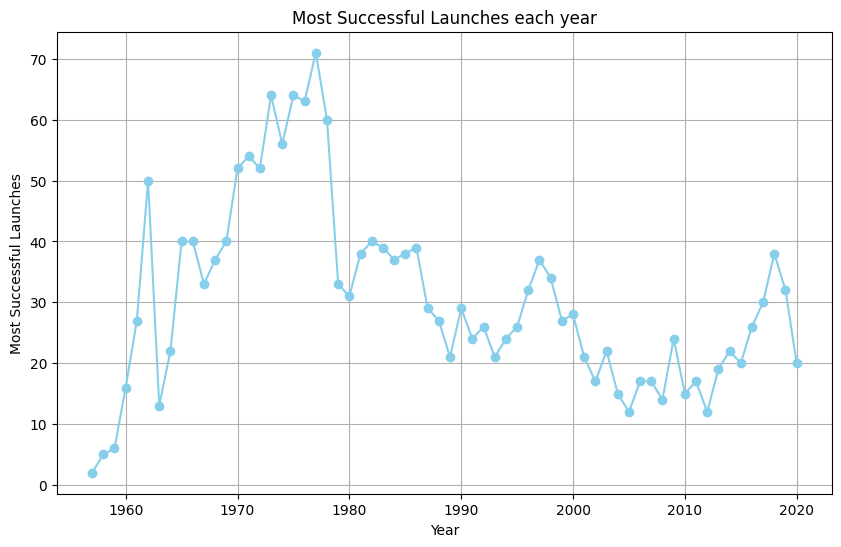

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(leading_countries_each_year['Year'], leading_countries_each_year['Total Launches'], marker='o', color='skyblue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Most Successful Launches')
plt.title('Most Successful Launches each year')

plt.grid(True)
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
leading_orgs_by_year = launches_by_org_year.loc[launches_by_org_year.groupby('Year')['Launches'].idxmax()]
leading_orgs_by_year

,Organisation,Year,Launches
497,RVSN USSR,1957,2
609,US Navy,1958,12
584,US Air Force,1959,10
585,US Air Force,1960,21
586,US Air Force,1961,23
...,...,...,...
117,CASC,2016,22
563,SpaceX,2017,18
119,CASC,2018,37
120,CASC,2019,27


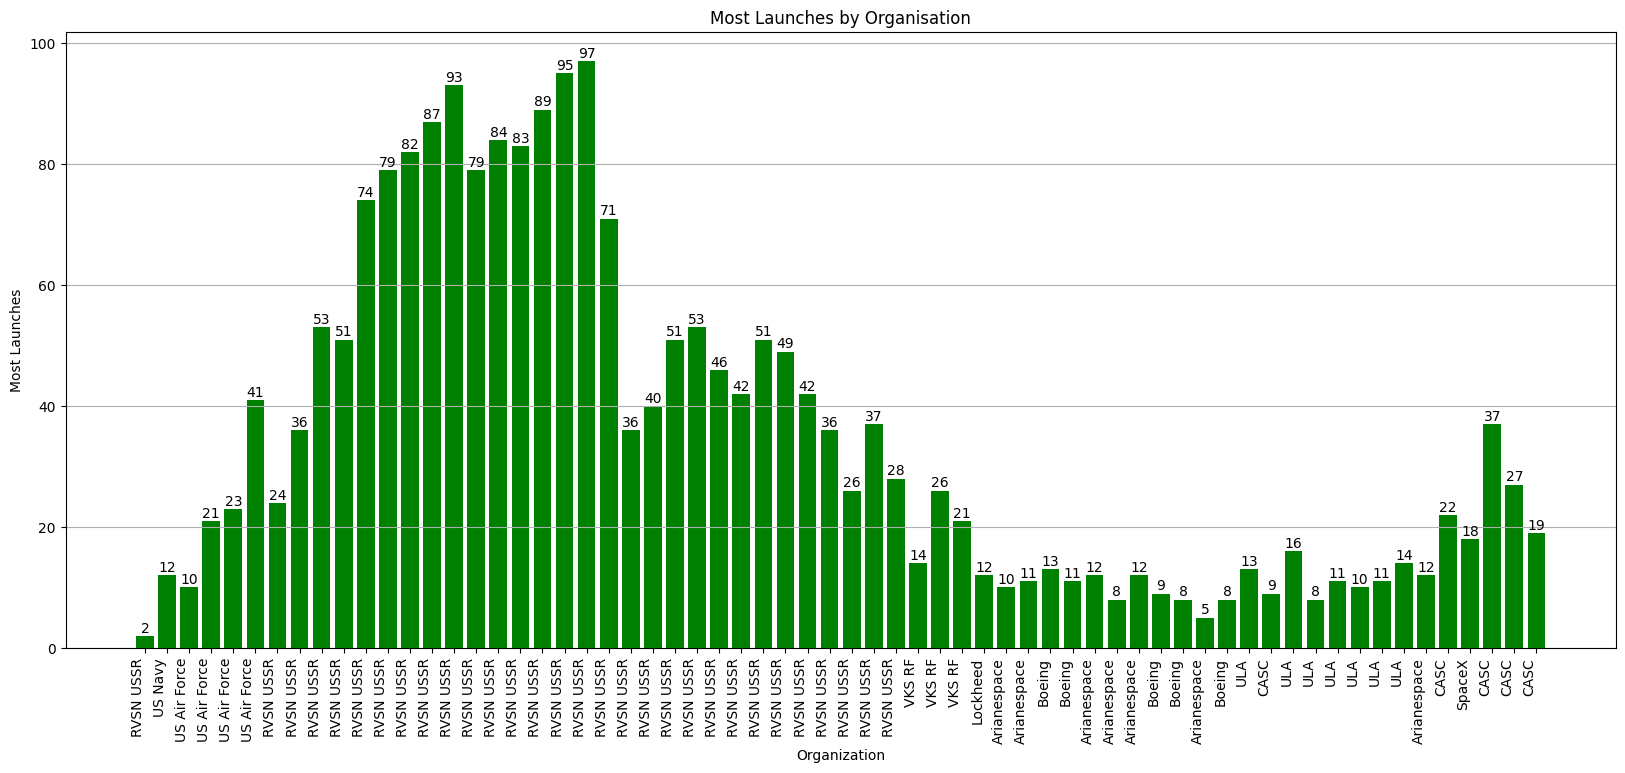

In [ ]:
# Plotting a bar graph
plt.figure(figsize=(20, 8))
bars = plt.bar(range(len(leading_orgs_by_year)), leading_orgs_by_year['Launches'], color='green')

# Setting organization names as x-axis ticks
plt.xticks(range(len(leading_orgs_by_year)), leading_orgs_by_year['Organisation'], rotation=90, ha='right')

# Adding labels and title
plt.xlabel('Organization')
plt.ylabel('Most Launches')
plt.title('Most Launches by Organisation')

# Adding values on top of each bar
for bar, value in zip(bars, leading_orgs_by_year['Launches']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(value), ha='center', va='bottom')

plt.grid(axis='y')  # Adding grid on the y-axis
plt.show()
